In [1]:
#!pip install pandas_profiling
#!pip install missingno

In [2]:
import warnings 
warnings.filterwarnings('ignore')

In [3]:
#Importing Libraries
import pandas as pd
import numpy as np
import csv

import glob
import sys
import missingno as msno
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pandas_profiling
%matplotlib inline

In [4]:
print('Python version ' + sys.version)
print('Numpy version ' + np.__version__)
print('Pandas version ' + pd.__version__)
print('Matplotlib version ' + matplotlib.__version__ )
print('Missingno version ' + msno.__version__)

Python version 3.6.4 |Anaconda custom (64-bit)| (default, Jan 16 2018, 10:22:32) [MSC v.1900 64 bit (AMD64)]
Numpy version 1.14.5
Pandas version 0.23.3
Matplotlib version 2.1.2
Missingno version 0.4.1


In [5]:
filelist = glob.glob('data\Raw-Data\*.csv')
filelist.remove('data\Raw-Data\metadata.csv')
filelist

['data\\Raw-Data\\expedition_everest.csv',
 'data\\Raw-Data\\rock_n_rollercoaster.csv',
 'data\\Raw-Data\\soarin.csv',
 'data\\Raw-Data\\splash_mountain.csv']

In [6]:
filelist[0][:-4]

'data\\Raw-Data\\expedition_everest'

In [7]:
# For all of the filenames:
foof = {}

for filename in filelist:
    foof[filename[:-4]] = pd.read_csv(filename)

In [8]:
foof["data\\Raw-Data\\expedition_everest"].tail()

date  SPOSTMIN  SACTMIN
146246  7/30/2018       NaN      NaN
146247  7/30/2018       NaN      NaN
146248  7/30/2018       NaN      NaN
146249  7/30/2018       NaN      NaN
146250  7/30/2018       NaN      NaN

In [9]:
goof = {}

for foo in foof:
    foof[foo]["date"] = pd.to_datetime(foof[foo]["date"], format="%m/%d/%Y")
    foof[foo] = foof[foo][foof[foo]["SPOSTMIN"] != -999.0]
    goof[foo] = foof[foo].groupby("date").mean().reset_index()

In [10]:
type(foof["data\\Raw-Data\\splash_mountain"]["date"][0])

pandas._libs.tslibs.timestamps.Timestamp

In [11]:
goof["data\\Raw-Data\\splash_mountain"].tail()

date   SPOSTMIN    SACTMIN
1163 2018-07-26  60.406977        NaN
1164 2018-07-27  62.435897   9.000000
1165 2018-07-28  41.048387  48.333333
1166 2018-07-29  49.759036        NaN
1167 2018-07-30  57.934783  37.666667

In [12]:
metadata = pd.read_csv("data\Raw-Data\metadata.csv")
metadata["DATE"] = pd.to_datetime(metadata["DATE"], format="%m/%d/%Y")
print(type(metadata["DATE"][0]))
metadata.rename(columns={"DATE" : "date"}, inplace=True)

metadata.tail()

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


date WDW_TICKET_SEASON  DAYOFWEEK  DAYOFYEAR  WEEKOFYEAR  \
1300 2018-07-26           regular          5        206          29   
1301 2018-07-27           regular          6        207          29   
1302 2018-07-28           regular          7        208          29   
1303 2018-07-29           regular          1        209          30   
1304 2018-07-30           regular          2        210          30   

      MONTHOFYEAR  YEAR        SEASON  HOLIDAYPX  HOLIDAYM       ...         \
1300            7  2018  SUMMER BREAK         23         0       ...          
1301            7  2018  SUMMER BREAK         24         0       ...          
1302            7  2018  SUMMER BREAK         25         0       ...          
1303            7  2018  SUMMER BREAK         26         0       ...          
1304            7  2018  SUMMER BREAK         27         0       ...          

     HSFIREWKS  AKPRDDAY AKPRDDT1 AKPRDDT2 AKPRDDN  AKFIREN  AKSHWNGT  \
1300         1         0      NaN      NaN     NaN      NaN         2   
1301         1         0      NaN      NaN     NaN      NaN         2   
1302         1         0      NaN      NaN     NaN      NaN         2   
1303         1         0      NaN      NaN     NaN      NaN         2   
1304         1         0      NaN      NaN     NaN      NaN         2   

     AKSHWNT1  AKSHWNT2          AKSHWNN  
1300    21:15     22:15  Rivers of Light  
1301    21:15     22:15  Rivers of Light  
1302    21:15     22:15  Rivers of Light  
1303    21:15     22:15  Rivers of Light  
1304    21:15     22:15  Rivers of Light  

[5 rows x 190 columns]

In [13]:
maxdate = metadata["date"].max()
mindate = "01/01/2015"
print(maxdate)
mask = (metadata['date'] >= mindate) & (metadata['date'] <= maxdate)

2018-07-30 00:00:00


In [14]:
metadata = metadata.loc[mask]
metadata

date WDW_TICKET_SEASON  DAYOFWEEK  DAYOFYEAR  WEEKOFYEAR  \
0    2015-01-01               NaN          5          0           0   
1    2015-01-02               NaN          6          1           0   
2    2015-01-03               NaN          7          2           0   
3    2015-01-04               NaN          1          3           1   
4    2015-01-05               NaN          2          4           1   
5    2015-01-06               NaN          3          5           1   
6    2015-01-07               NaN          4          6           1   
7    2015-01-08               NaN          5          7           1   
8    2015-01-09               NaN          6          8           1   
9    2015-01-10               NaN          7          9           1   
10   2015-01-11               NaN          1         10           2   
11   2015-01-12               NaN          2         11           2   
12   2015-01-13               NaN          3         12           2   
13   2015-01-14               NaN          4         13           2   
14   2015-01-15               NaN          5         14           2   
15   2015-01-16               NaN          6         15           2   
16   2015-01-17               NaN          7         16           2   
17   2015-01-18               NaN          1         17           3   
18   2015-01-19               NaN          2         18           3   
19   2015-01-20               NaN          3         19           3   
20   2015-01-21               NaN          4         20           3   
21   2015-01-22               NaN          5         21           3   
22   2015-01-23               NaN          6         22           3   
23   2015-01-24               NaN          7         23           3   
24   2015-01-25               NaN          1         24           4   
25   2015-01-26               NaN          2         25           4   
26   2015-01-27               NaN          3         26           4   
27   2015-01-28               NaN          4         27           4   
28   2015-01-29               NaN          5         28           4   
29   2015-01-30               NaN          6         29           4   
...         ...               ...        ...        ...         ...   
1275 2018-07-01              peak          1        181          26   
1276 2018-07-02              peak          2        182          26   
1277 2018-07-03              peak          3        183          26   
1278 2018-07-04              peak          4        184          26   
1279 2018-07-05           regular          5        185          26   
1280 2018-07-06           regular          6        186          26   
1281 2018-07-07           regular          7        187          26   
1282 2018-07-08           regular          1        188          27   
1283 2018-07-09           regular          2        189          27   
1284 2018-07-10           regular          3        190          27   
1285 2018-07-11           regular          4        191          27   
1286 2018-07-12           regular          5        192          27   
1287 2018-07-13           regular          6        193          27   
1288 2018-07-14           regular          7        194          27   
1289 2018-07-15           regular          1        195          28   
1290 2018-07-16           regular          2        196          28   
1291 2018-07-17           regular          3        197          28   
1292 2018-07-18           regular          4        198          28   
1293 2018-07-19           regular          5        199          28   
1294 2018-07-20           regular          6        200          28   
1295 2018-07-21           regular          7        201          28   
1296 2018-07-22           regular          1        202          29   
1297 2018-07-23           regular          2        203          29   
1298 2018-07-24           regular          3        204          29   
1299 2018-07-25           regular  

In [15]:
moof = {}
for goo in goof:
    mask = (goof[goo]['date'] >= mindate) & (goof[goo]['date'] <= maxdate)
    goof[goo] = goof[goo].loc[mask]
    print(goo)
    
    print(goof[goo].head())
    moof[goo] = pd.merge(goof[goo], metadata, on = "date")


data\Raw-Data\expedition_everest
        date   SPOSTMIN    SACTMIN
0 2015-01-01  40.268817  10.500000
1 2015-01-02  34.198113   5.500000
2 2015-01-03  29.793814  24.333333
3 2015-01-04  23.850000  25.000000
4 2015-01-05  26.956522   3.000000
data\Raw-Data\rock_n_rollercoaster
        date   SPOSTMIN  SACTMIN
0 2015-01-01  74.717742     41.2
1 2015-01-02  80.080645     26.0
2 2015-01-03  88.222222     30.0
3 2015-01-04   5.000000      NaN
4 2015-01-05  62.321429     21.0
data\Raw-Data\soarin
        date   SPOSTMIN    SACTMIN
0 2015-01-01  89.814815  61.000000
1 2015-01-02  82.389706  24.333333
2 2015-01-03  73.443396        NaN
3 2015-01-04  58.069307        NaN
4 2015-01-05  58.437500        NaN
data\Raw-Data\splash_mountain
        date   SPOSTMIN    SACTMIN
0 2015-01-01  28.156028  11.500000
1 2015-01-02  44.014085   1.000000
2 2015-01-03  43.198529  37.333333
3 2015-01-04  30.992063  16.000000
4 2015-01-31   6.724138        NaN


In [16]:
print(filelist[1])
moof[filelist[1][:-4]].head()

data\Raw-Data\rock_n_rollercoaster.csv


date   SPOSTMIN  SACTMIN WDW_TICKET_SEASON  DAYOFWEEK  DAYOFYEAR  \
0 2015-01-01  74.717742     41.2               NaN          5          0   
1 2015-01-02  80.080645     26.0               NaN          6          1   
2 2015-01-03  88.222222     30.0               NaN          7          2   
3 2015-01-04   5.000000      NaN               NaN          1          3   
4 2015-01-05  62.321429     21.0               NaN          2          4   

   WEEKOFYEAR  MONTHOFYEAR  YEAR          SEASON   ...    HSFIREWKS  AKPRDDAY  \
0           0            1  2015  CHRISTMAS PEAK   ...            1         0   
1           0            1  2015       CHRISTMAS   ...            1         0   
2           0            1  2015       CHRISTMAS   ...            1         0   
3           1            1  2015       CHRISTMAS   ...            1         0   
4           1            1  2015       CHRISTMAS   ...            1         0   

  AKPRDDT1  AKPRDDT2 AKPRDDN AKFIREN AKSHWNGT  AKSHWNT1  AKSHWNT2 AKSHWNN  
0      NaN       NaN     NaN     NaN        0       NaN       NaN     NaN  
1      NaN       NaN     NaN     NaN        0       NaN       NaN     NaN  
2      NaN       NaN     NaN     NaN        0       NaN       NaN     NaN  
3      NaN       NaN     NaN     NaN        0       NaN       NaN     NaN  
4      NaN       NaN     NaN     NaN        0       NaN       NaN     NaN  

[5 rows x 192 columns]

In [17]:
moof[filelist[1][:-4]].tail()

date   SPOSTMIN  SACTMIN WDW_TICKET_SEASON  DAYOFWEEK  DAYOFYEAR  \
1285 2018-07-26  63.206897      NaN           regular          5        206   
1286 2018-07-27  65.566667      5.6           regular          6        207   
1287 2018-07-28  46.726619      7.0           regular          7        208   
1288 2018-07-29  45.856164      1.0           regular          1        209   
1289 2018-07-30  46.493056      NaN           regular          2        210   

      WEEKOFYEAR  MONTHOFYEAR  YEAR        SEASON       ...         HSFIREWKS  \
1285          29            7  2018  SUMMER BREAK       ...                 1   
1286          29            7  2018  SUMMER BREAK       ...                 1   
1287          29            7  2018  SUMMER BREAK       ...                 1   
1288          30            7  2018  SUMMER BREAK       ...                 1   
1289          30            7  2018  SUMMER BREAK       ...                 1   

      AKPRDDAY AKPRDDT1  AKPRDDT2 AKPRDDN AKFIREN AKSHWNGT  AKSHWNT1  \
1285         0      NaN       NaN     NaN     NaN        2     21:15   
1286         0      NaN       NaN     NaN     NaN        2     21:15   
1287         0      NaN       NaN     NaN     NaN        2     21:15   
1288         0      NaN       NaN     NaN     NaN        2     21:15   
1289         0      NaN       NaN     NaN     NaN        2     21:15   

      AKSHWNT2          AKSHWNN  
1285     22:15  Rivers of Light  
1286     22:15  Rivers of Light  
1287     22:15  Rivers of Light  
1288     22:15  Rivers of Light  
1289     22:15  Rivers of Light  

[5 rows x 192 columns]

In [18]:
moof[filelist[1][:-4]]

date   SPOSTMIN    SACTMIN WDW_TICKET_SEASON  DAYOFWEEK  DAYOFYEAR  \
0    2015-01-01  74.717742  41.200000               NaN          5          0   
1    2015-01-02  80.080645  26.000000               NaN          6          1   
2    2015-01-03  88.222222  30.000000               NaN          7          2   
3    2015-01-04   5.000000        NaN               NaN          1          3   
4    2015-01-05  62.321429  21.000000               NaN          2          4   
5    2015-01-06  61.428571  11.000000               NaN          3          5   
6    2015-01-07  64.666667  36.000000               NaN          4          6   
7    2015-01-08  55.101010  29.666667               NaN          5          7   
8    2015-01-09  60.476190  42.000000               NaN          6          8   
9    2015-01-10  54.087591  40.333333               NaN          7          9   
10   2015-01-11  37.462687  11.400000               NaN          1         10   
11   2015-01-12  45.527950  18.333333               NaN          2         11   
12   2015-01-13  40.261194  34.250000               NaN          3         12   
13   2015-01-14  35.196850        NaN               NaN          4         13   
14   2015-01-15  33.063063  34.000000               NaN          5         14   
15   2015-01-16  42.727273  28.666667               NaN          6         15   
16   2015-01-17  86.032258  20.500000               NaN          7         16   
17   2015-01-18  70.076923  47.000000               NaN          1         17   
18   2015-01-19  67.980132  26.333333               NaN          2         18   
19   2015-01-20  75.986842  72.000000               NaN          3         19   
20   2015-01-21  45.071942        NaN               NaN          4         20   
21   2015-01-22  47.560000  32.750000               NaN          5         21   
22   2015-01-23  42.642276  29.666667               NaN          6         22   
23   2015-01-24  47.913669   6.000000               NaN          7         23   
24   2015-01-25  57.250000  13.666667               NaN          1         24   
25   2015-01-26  34.909091  20.100000               NaN          2         25   
26   2015-01-27  49.160584  12.000000               NaN          3         26   
27   2015-01-28  54.545455  16.000000               NaN          4         27   
28   2015-01-29  39.078947        NaN               NaN          5         28   
29   2015-01-30  65.590551  64.000000               NaN          6         29   
...         ...        ...        ...               ...        ...        ...   
1260 2018-07-01  61.472603  21.000000              peak          1        181   
1261 2018-07-02  74.522059  80.000000              peak          2        182   
1262 2018-07-03  72.200000  76.333333              peak          3        183   
1263 2018-07-04  55.325203  62.000000              peak          4        184   
1264 2018-07-05  69.137931  35.000000           regular          5        185   
1265 2018-07-06  61.353383  21.250000           regular          6        186   
1266 2018-07-07  41.423841  25.000000           regular          7        187   
1267 2018-07-08  47.655172        NaN           regular          1        188   
1268 2018-07-09  51.818182        NaN           regular          2        189   
1269 2018-07-10  55.206897  47.500000           regular          3        190   
1270 2018-07-11  47.123288  20.333333           regular          4        191   
1271 2018-07-12  51.487603   7.000000           regular          5        192   
1272 2018-07-13  74.233333  13.000000           regular          6        193   
1273 2018-07-14  43.308271        NaN           regular          7        194   
1274 2018-07-15  40.369128  13.333333           regular          1        195   
1275 2018-07-16  46.360544  30.000000           regular          2        196   
1276 2018-07-17  54.629630  13.000000           regular          3        197   
1277 2018-07-18  64.897260  41.333333     

In [19]:
######THIS STEP IS NOW LOOKING AT MISSING DATA IN META DATA######

In [20]:
moof[filelist[1][:-4]].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1290 entries, 0 to 1289
Columns: 192 entries, date to AKSHWNN
dtypes: datetime64[ns](1), float64(39), int64(62), object(90)
memory usage: 1.9+ MB


In [21]:
moof[filelist[1][:-4]].isnull().sum()

date                    0
SPOSTMIN                2
SACTMIN               229
WDW_TICKET_SEASON     423
DAYOFWEEK               0
DAYOFYEAR               0
WEEKOFYEAR              0
MONTHOFYEAR             0
YEAR                    0
SEASON                  0
HOLIDAYPX               0
HOLIDAYM                0
HOLIDAYN             1160
HOLIDAY                 0
WDWTICKETSEASON       423
WDWRaceN             1236
WDWeventN            1228
WDWevent                0
WDWrace                 0
WDWSEASON               0
WDWMAXTEMP              5
WDWMINTEMP              6
WDWMEANTEMP             6
MKeventN             1037
MKevent                 0
EPeventN              667
EPevent                 0
HSeventN             1227
HSevent                 0
AKeventN             1276
                     ... 
MKPRDNN               642
MKFIREWK                0
MKFIRET1                8
MKFIRET2             1284
MKFIREN                 8
EPFIREWK                0
EPFIRET1                2
EPFIRET2    

In [22]:
moof[filelist[1][:-4]].notnull().sum()

date                 1290
SPOSTMIN             1288
SACTMIN              1061
WDW_TICKET_SEASON     867
DAYOFWEEK            1290
DAYOFYEAR            1290
WEEKOFYEAR           1290
MONTHOFYEAR          1290
YEAR                 1290
SEASON               1290
HOLIDAYPX            1290
HOLIDAYM             1290
HOLIDAYN              130
HOLIDAY              1290
WDWTICKETSEASON       867
WDWRaceN               54
WDWeventN              62
WDWevent             1290
WDWrace              1290
WDWSEASON            1290
WDWMAXTEMP           1285
WDWMINTEMP           1284
WDWMEANTEMP          1284
MKeventN              253
MKevent              1290
EPeventN              623
EPevent              1290
HSeventN               63
HSevent              1290
AKeventN               14
                     ... 
MKPRDNN               648
MKFIREWK             1290
MKFIRET1             1282
MKFIRET2                6
MKFIREN              1282
EPFIREWK             1290
EPFIRET1             1288
EPFIRET2    

In [23]:
pandas_profiling.ProfileReport(moof[filelist[1][:-4]])

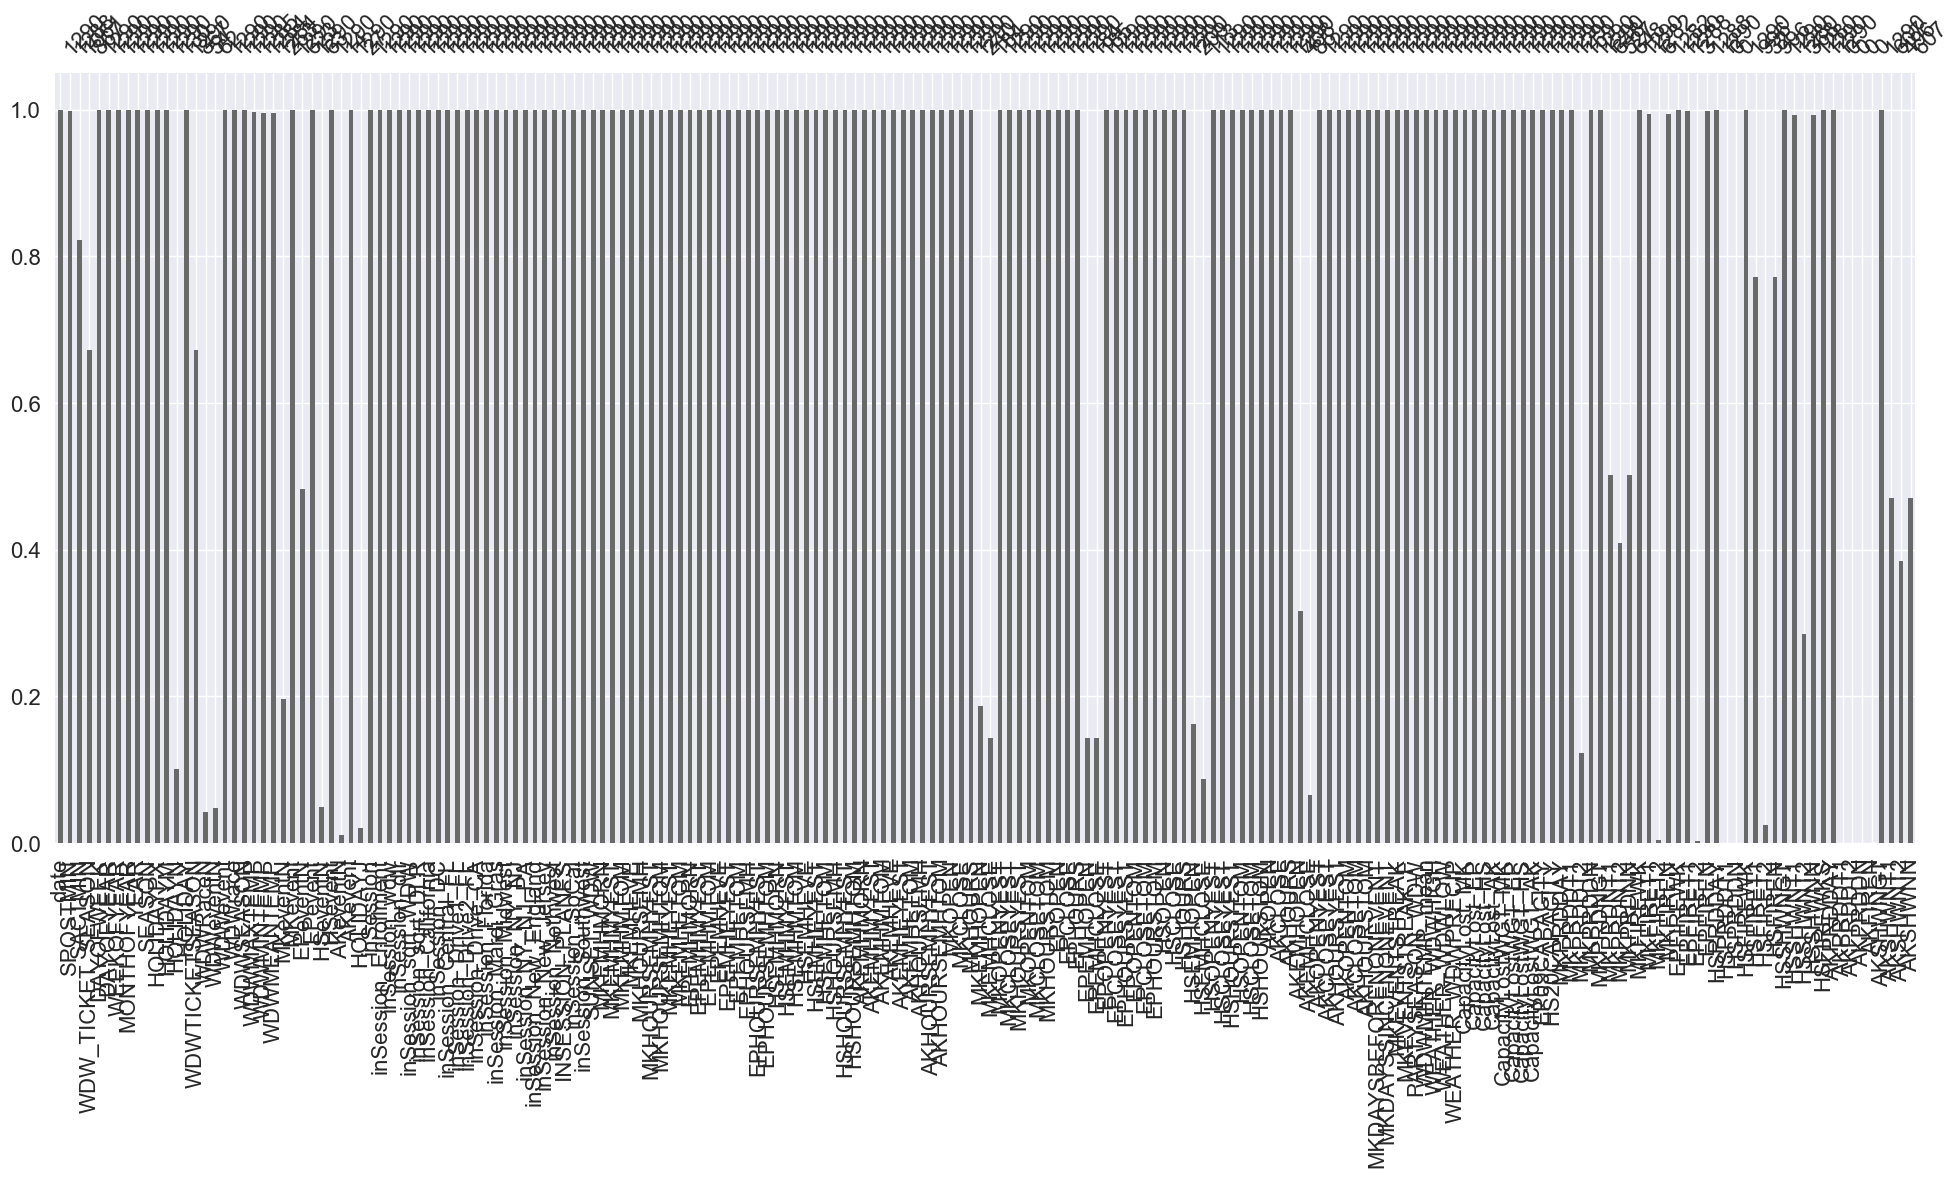

In [24]:
msno.bar(moof[filelist[1][:-4]].sample(1290))

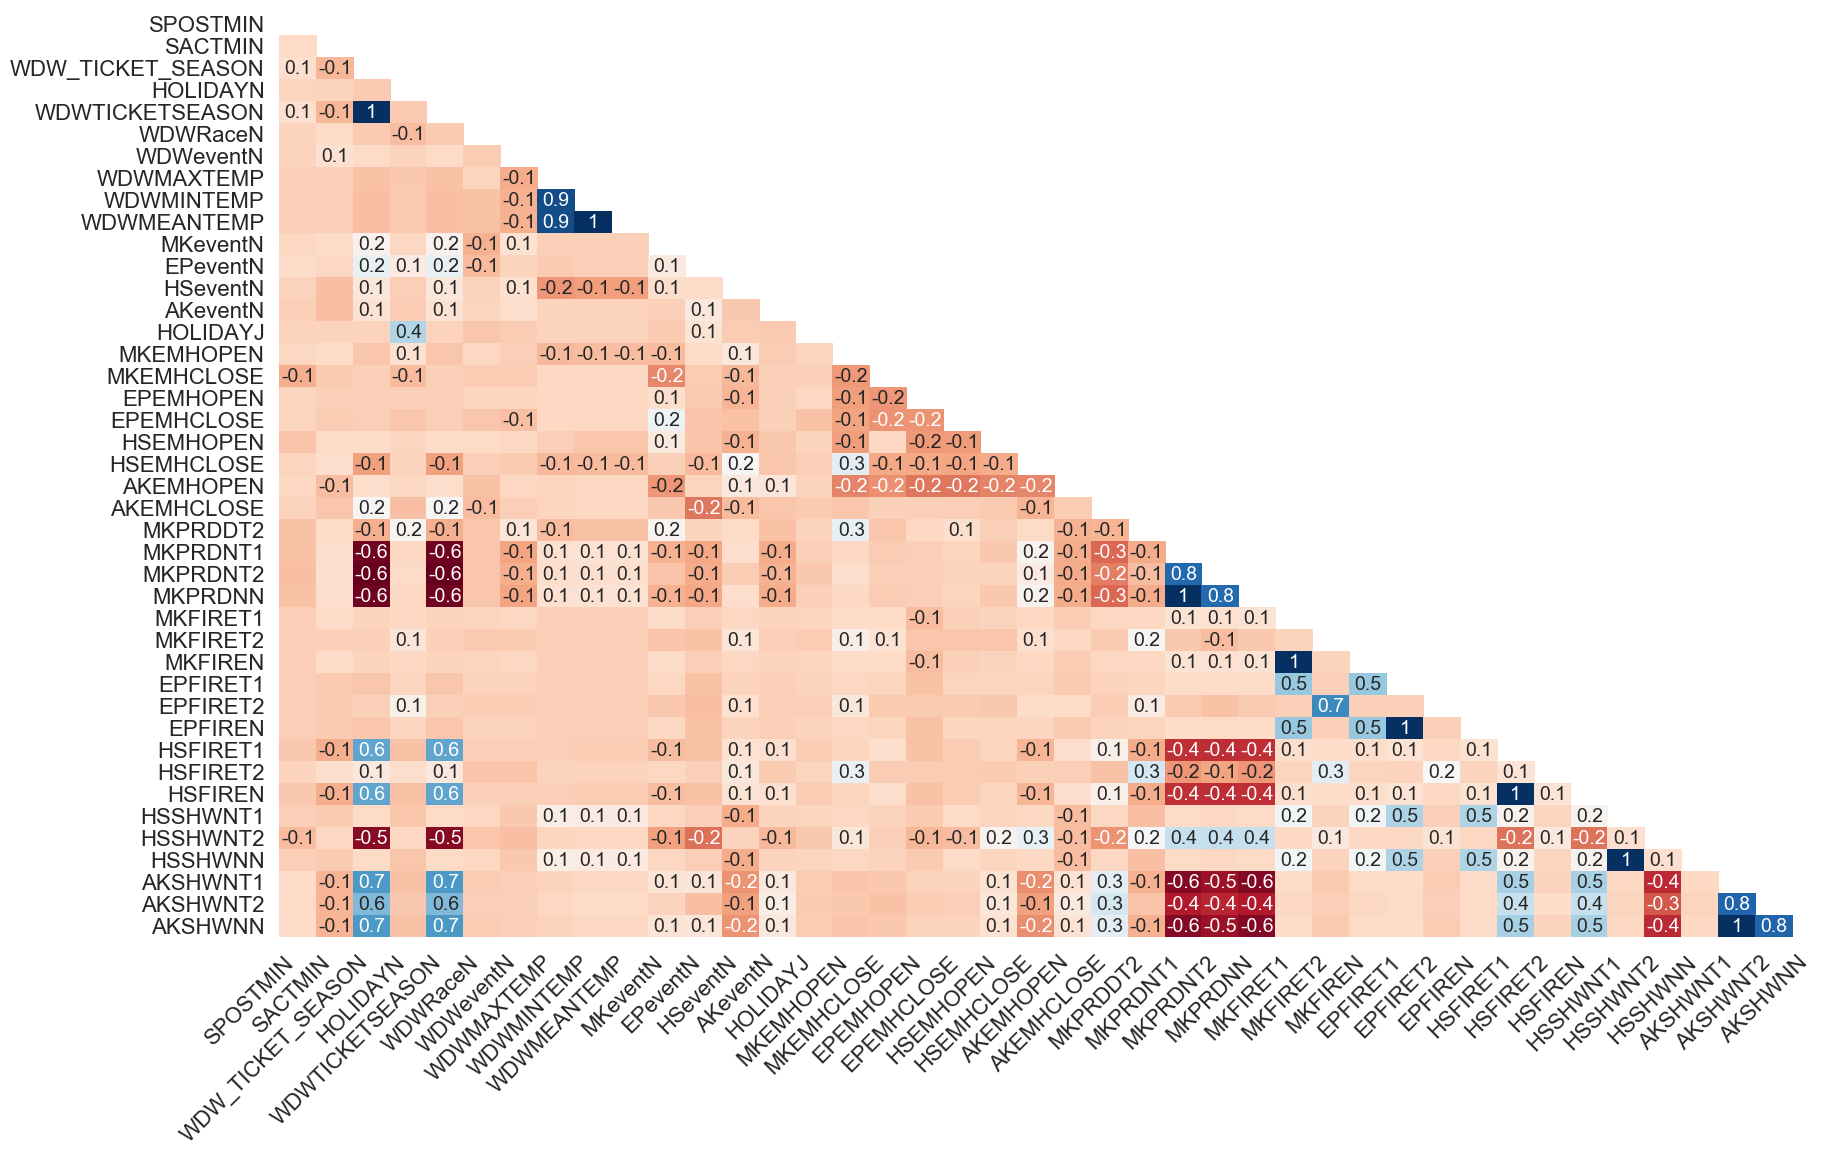

In [25]:
msno.heatmap(moof[filelist[1][:-4]])

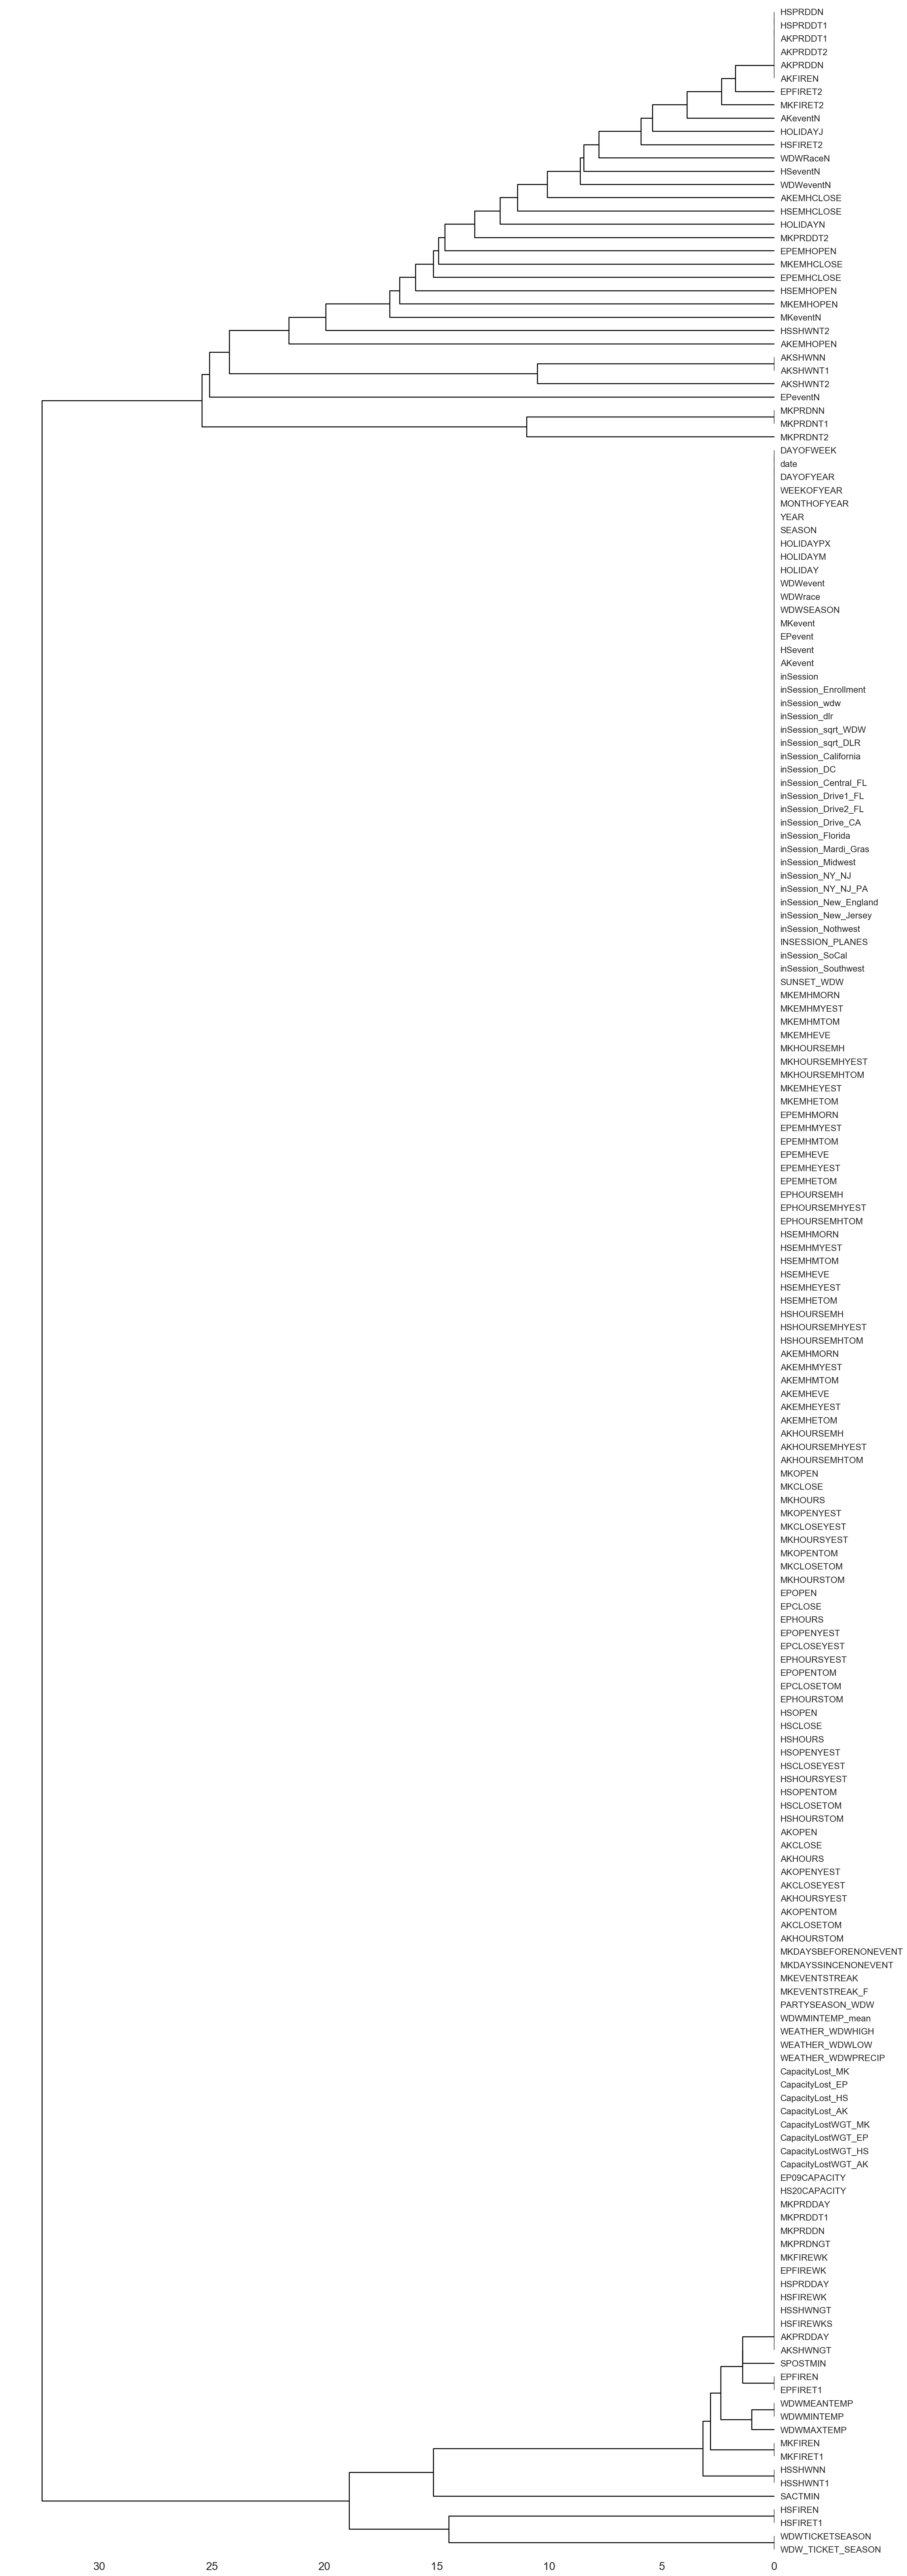

In [26]:
msno.dendrogram(moof[filelist[1][:-4]])

In [36]:
delete = ['AKFIREN', 'AKPRDDAY', 'AKPRDDN', 'AKPRDDT1', 'AKPRDDT2', 'HSPRDDN', 'HSPRDDT1', 'HSFIREWKS', 'HSPRDDAY', 'HSPRDDN', 'inSession_SoCal','AKCLOSETOM','AKCLOSEYEST','AKEMHETOM','AKEMHEYEST','AKEMHMTOM','AKEMHMYEST','AKHOURSEMHTOM','AKHOURSEMHYEST','AKHOURSTOM','AKHOURSYEST','AKOPENTOM','AKOPENYEST','AKSHWNN','DAYOFWEEK','DAYOFYEAR','EPCLOSETOM','EPCLOSEYEST','EPEMHETOM','EPEMHEYEST','EPEMHMTOM','EPEMHMYEST','EPeventN','EPFIREN','EPHOURSEMHTOM','EPHOURSEMHYEST','EPHOURSTOM','EPHOURSYEST','EPOPENTOM','EPOPENYEST','HOLIDAYJ','HOLIDAYN','HSCLOSETOM','HSCLOSEYEST','HSEMHETOM','HSEMHEYEST','HSEMHMTOM','HSEMHMYEST','HSeventN','HSFIREN','HSHOURSEMHTOM','HSHOURSEMHYEST','HSHOURSTOM','HSHOURSYEST','HSOPENTOM','HSOPENYEST','HSSHWNN','MKCLOSETOM','MKCLOSEYEST','MKEMHETOM','MKEMHEYEST','MKEMHMTOM','MKEMHMYEST','MKeventN','MKFIREN','MKHOURSEMHTOM','MKHOURSEMHYEST','MKHOURSTOM','MKHOURSYEST','MKOPENTOM','MKOPENYEST','MKPRDDN','MKPRDNN','MONTHOFYEAR','WDWeventN','WDWRaceN','WEEKOFYEAR','YEAR'
]
for moo in moof:
    moof[moo] = moof[moo].drop(delete, axis=1)

In [37]:
print(len(list(moof[moo].columns)))

115


In [39]:
for moo in moof:
    moof[moo] = moof[moo][np.isfinite(moof[moo]['SACTMIN'])]

In [40]:
moof[moo]

date   SPOSTMIN    SACTMIN WDW_TICKET_SEASON           SEASON  \
0    2015-01-01  28.156028  11.500000               NaN   CHRISTMAS PEAK   
1    2015-01-02  44.014085   1.000000               NaN        CHRISTMAS   
2    2015-01-03  43.198529  37.333333               NaN        CHRISTMAS   
3    2015-01-04  30.992063  16.000000               NaN        CHRISTMAS   
5    2015-02-01  16.721311  11.400000               NaN           WINTER   
7    2015-02-03  14.233333   2.500000               NaN           WINTER   
8    2015-02-04  13.129032   5.000000               NaN           WINTER   
9    2015-02-05   5.680000   3.000000               NaN           WINTER   
10   2015-02-06  20.843023  14.000000               NaN           WINTER   
11   2015-02-07  18.341709  31.000000               NaN           WINTER   
12   2015-02-08  19.365079  14.500000               NaN           WINTER   
13   2015-02-09   9.594595   3.000000               NaN           WINTER   
15   2015-02-11  13.545455  14.500000               NaN           WINTER   
16   2015-02-12  21.949686  15.500000               NaN  PRESIDENTS WEEK   
17   2015-02-13  16.016043   3.500000               NaN  PRESIDENTS WEEK   
20   2015-02-16  34.338624  14.200000               NaN  PRESIDENTS WEEK   
22   2015-02-18  18.316327  14.000000               NaN  PRESIDENTS WEEK   
24   2015-02-20   9.587912  15.000000               NaN  PRESIDENTS WEEK   
25   2015-02-21  20.386598  18.500000               NaN  PRESIDENTS WEEK   
26   2015-02-22  28.502825  35.000000               NaN  PRESIDENTS WEEK   
27   2015-02-23  25.696970  39.000000               NaN           WINTER   
28   2015-02-24  17.329545  18.666667               NaN           WINTER   
29   2015-02-25  13.478261  12.666667               NaN           WINTER   
30   2015-02-26  10.671141   8.333333               NaN           WINTER   
31   2015-02-27   5.638298   1.000000               NaN           WINTER   
32   2015-02-28   7.670455   3.000000               NaN           WINTER   
33   2015-03-01  25.789474  19.250000               NaN           SPRING   
34   2015-03-02  27.542373  21.500000               NaN           SPRING   
35   2015-03-03  26.506410  17.000000               NaN           SPRING   
36   2015-03-04  16.554878  11.000000               NaN           SPRING   
...         ...        ...        ...               ...              ...   
1129 2018-06-22  67.083333  48.000000           regular           SPRING   
1130 2018-06-23  67.366071  13.500000           regular           SPRING   
1131 2018-06-24  59.072581  22.250000           regular           SPRING   
1132 2018-06-25  79.854015  15.000000              peak           SPRING   
1133 2018-06-26  72.703704  58.000000              peak           SPRING   
1134 2018-06-27  73.795620  46.000000              peak           SPRING   
1136 2018-06-29  63.876404  18.000000              peak           SPRING   
1137 2018-06-30  38.811475  10.500000              peak           SPRING   
1138 2018-07-01  52.796610   9.000000              peak     SUMMER BREAK   
1140 2018-07-03  69.210526   3.000000              peak         JULY 4TH   
1141 2018-07-04  70.887097  13.000000              peak         JULY 4TH   
1142 2018-07-05  70.275591  48.000000           regular         JULY 4TH   
1143 2018-07-06  56.296296  31.000000           regular         JULY 4TH   
1144 2018-07-07  45.625000  11.750000           regular     SUMMER BREAK   
1145 2018-07-08  47.892157  33.500000           regular     SUMMER BREAK   
1146 2018-07-09  70.595238  46.000000           regular     SUMMER BREAK   
1147 2018-07-10  69.205607  29.500000           regular     SUMMER BREAK   
1149 2018-07-12  61.386555  36.000000           regular     SUMMER BREAK   
1150 2018-07-13  63.225806  29.000000           regular     SUMMER BREAK   
1151 2018-07-14  49.909910  10.000000           regular     SUMMER BREAK   
1152 2018-07-15  52.698413  35.600000           regular    

In [43]:
doof = {}
for moo in moof:
    doof[moo] = moof[moo].drop(["SPOSTMIN"], axis = 1)
    print(moof)
    print(doof[moo].head(5))

{'data\\Raw-Data\\expedition_everest':            date   SPOSTMIN    SACTMIN WDW_TICKET_SEASON  \
0    2015-01-01  40.268817  10.500000               NaN   
1    2015-01-02  34.198113   5.500000               NaN   
2    2015-01-03  29.793814  24.333333               NaN   
3    2015-01-04  23.850000  25.000000               NaN   
4    2015-01-05  26.956522   3.000000               NaN   
5    2015-01-06  26.666667  10.333333               NaN   
6    2015-01-07  33.283582   9.000000               NaN   
7    2015-01-08  30.846154  35.000000               NaN   
8    2015-01-09  22.631579   7.666667               NaN   
9    2015-01-10  24.340278  27.500000               NaN   
10   2015-01-11  16.127451   9.500000               NaN   
11   2015-01-12  11.936937   0.000000               NaN   
12   2015-01-13   8.137255   3.000000               NaN   
14   2015-01-15  15.891089  11.500000               NaN   
15   2015-01-16  22.809524  22.250000               NaN   
16   2015-01-17  

{'data\\Raw-Data\\expedition_everest':            date   SPOSTMIN    SACTMIN WDW_TICKET_SEASON  \
0    2015-01-01  40.268817  10.500000               NaN   
1    2015-01-02  34.198113   5.500000               NaN   
2    2015-01-03  29.793814  24.333333               NaN   
3    2015-01-04  23.850000  25.000000               NaN   
4    2015-01-05  26.956522   3.000000               NaN   
5    2015-01-06  26.666667  10.333333               NaN   
6    2015-01-07  33.283582   9.000000               NaN   
7    2015-01-08  30.846154  35.000000               NaN   
8    2015-01-09  22.631579   7.666667               NaN   
9    2015-01-10  24.340278  27.500000               NaN   
10   2015-01-11  16.127451   9.500000               NaN   
11   2015-01-12  11.936937   0.000000               NaN   
12   2015-01-13   8.137255   3.000000               NaN   
14   2015-01-15  15.891089  11.500000               NaN   
15   2015-01-16  22.809524  22.250000               NaN   
16   2015-01-17  

In [45]:
doof["data\\Raw-Data\\splash_mountain"].head()

date    SACTMIN WDW_TICKET_SEASON          SEASON  HOLIDAYPX  \
0 2015-01-01  11.500000               NaN  CHRISTMAS PEAK          0   
1 2015-01-02   1.000000               NaN       CHRISTMAS          2   
2 2015-01-03  37.333333               NaN       CHRISTMAS          3   
3 2015-01-04  16.000000               NaN       CHRISTMAS          4   
5 2015-02-01  11.400000               NaN          WINTER          0   

   HOLIDAYM  HOLIDAY WDWTICKETSEASON  WDWevent  WDWrace   ...    EPFIRET2  \
0         5        1             NaN         0        0   ...         NaN   
1         5        0             NaN         0        0   ...         NaN   
2         0        0             NaN         0        0   ...         NaN   
3         0        0             NaN         0        0   ...         NaN   
5         0        1             NaN         0        0   ...         NaN   

   HSFIREWK  HSFIRET1  HSFIRET2  HSSHWNGT  HSSHWNT1  HSSHWNT2 AKSHWNGT  \
0         0       NaN       NaN         3     18:30     20:00        0   
1         0       NaN       NaN         3     18:30     20:00        0   
2         0       NaN       NaN         2     18:30     20:00        0   
3         0       NaN       NaN         2     19:00     20:30        0   
5         0       NaN       NaN         1     19:00       NaN        0   

   AKSHWNT1 AKSHWNT2  
0       NaN      NaN  
1       NaN      NaN  
2       NaN      NaN  
3       NaN      NaN  
5       NaN      NaN  

[5 rows x 114 columns]

In [51]:
for doo in doof:
    doof[doo].to_csv(f'{doo}.csv', index = False)

In [53]:
#len(moof["rock_n_rollercoaster"]["SPOSTMIN"].unique)

KeyError: 'rock_n_rollercoaster'